In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [2]:
final = pd.read_csv('MME_final.csv', encoding = 'euc-kr', low_memory = False)
final

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMCDMAG,FMHEA,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG
0,A01,NIH1604000095,2,6,1.0,5.0,7.0,6.0,4.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
3,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
4,A01,NIH1604000424,1,4,8.0,5.0,8.0,8.0,0.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
70206,A07,NIH1604999732,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
70207,A07,NIH1604999772,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
70208,A07,NIH1604999929,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [3]:
selected = pd.read_csv('MME_.csv', encoding = 'euc-kr', low_memory = False)
selected

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,R_GTP_TR,...,PHYACTM,PHYACTH,BODYFAT,MET_CAL,PA_NEW,SBP,DBP,eGFR,BMI,DRK_NEW
0,A01,200209.0,NIH1604000095,43.0,2,1.575,48.0,63.0,91.0,16.0,...,3.50,1.75,13400.0,2571.0,2,96.0,63.0,78.564168,19.349962,2
1,A01,200201.0,NIH1604000171,42.0,1,1.755,75.0,81.3,88.0,27.0,...,5.50,0.00,15700.0,2409.0,2,95.0,68.0,92.420166,24.350452,5
2,A01,200210.0,NIH1604000338,69.0,1,1.668,50.4,74.0,82.0,52.0,...,0.00,4.50,NaN,2407.5,2,138.0,69.0,86.839489,18.115004,1
3,A01,200201.0,NIH1604000362,48.0,2,1.556,53.6,76.4,110.0,38.0,...,0.75,0.75,14700.0,886.5,2,102.0,74.0,102.784214,22.138368,1
4,A01,200205.0,NIH1604000424,47.0,1,1.745,88.0,94.5,81.0,5.0,...,5.50,0.00,19500.0,2409.0,2,131.0,84.0,112.380813,28.899599,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,201303.0,NIH1604999643,55.0,2,1.641,60.9,74.0,88.0,NaN,...,NaN,NaN,17900.0,NaN,0,92.0,62.0,74.201919,22.615184,1
70206,A07,201407.0,NIH1604999732,75.0,1,1.632,50.8,81.3,110.0,NaN,...,NaN,NaN,10500.0,NaN,0,131.0,66.0,68.312024,19.073193,3
70207,A07,201409.0,NIH1604999772,55.0,1,1.635,66.2,88.3,85.0,NaN,...,NaN,NaN,13900.0,NaN,0,NaN,NaN,50.048887,24.764096,2
70208,A07,201403.0,NIH1604999929,53.0,2,1.530,63.2,85.3,95.0,NaN,...,NaN,NaN,27100.0,NaN,0,112.0,71.0,74.230720,26.998163,2


#### 약물 관련 변수만 추출

기수, NIHID, VISIT, VISITALL, EDATE, SEX, AGE,   # 기본변수           
DRUGST, DRUGSTYR1, DRUGSTCU, DRUGSTYR2, # 스테로이드                  
DRUGSP, DRUGSPYR1, DRUGSPCU, DRUGSPYR2, # 항경련제                  
DRUGSL, DRUGSLYR1, DRUGSLCU, DRUGSLYR2, # 항응고제                  
DRUGCP, DRUGCPYR1, DRUGCPCU, DRUGCPYR2, # 경구피임제                  
DRUGTB, DRUGTBYR1, DRUGTBCU, DRUGTBYR2, # 결핵약                  
DRUGINS, DRUGINSYR1, DRUGINSCU, DRUGINSYR2, # 인슐린                  
DRUGHT, DRUGHTYR1, DRUGHTCU, DRUGHTYR2, # 혈압약                  
DRUGAR, DRUGARYR1, DRUGARCU, DRUGARYR2, # 관절약                  
DRUGUL, DRUGULYR1, DRUGULCU, DRUGULYR2, # 위염 / 위궤양약                  
DRUGTH, DRUGTHYR1, DRUGTHCU, DRUGTHYR2, # 갑상선약                  
DRUGOR, DRUGORYR1, DRUGORCU, DRUGORYR2, # 한약 (보약)                  
DRUGFH, DRUGFHYR1, DRUGFHCU, DRUGFHYR2, # 여성호르몬                  
DRUGOS, DRUGOSYR1, DRUGOSCU, DRUGOSYR2, # 골다공증 치료제                  
DRUGDM, DRUGDMYR1, DRUGDMCU, DRUGDMYR2, # 경구용 당뇨약                  
DRUGICD, DRUGICDYR1, DRUGICDCU, DRUGICDYR2, # 뇌졸중약                  
DRUGDI, DRUGDIYR1, DRUGDICU, DRUGDIYR2, # 이뇨제                  
DRUGAS, DRUGASYR1, DRUGASCU, DRUGASYR2, # 천식약                  
DRUGLP, DRUGLPYR1, DRUGLPCU, DRUGLPYR2 # 고지혈증약                  

In [4]:
drug = final[['기수', 'NIHID', 'VISIT', 'VISITALL', 'EDATE', 'SEX', 'AGE',
'DRUGST', 'DRUGSTYR1', 'DRUGSTCU', 'DRUGSTYR2',
'DRUGSP', 'DRUGSPYR1', 'DRUGSPCU', 'DRUGSPYR2',
'DRUGSL', 'DRUGSLYR1', 'DRUGSLCU', 'DRUGSLYR2',
'DRUGCP', 'DRUGCPYR1', 'DRUGCPCU', 'DRUGCPYR2',
'DRUGTB', 'DRUGTBYR1', 'DRUGTBCU', 'DRUGTBYR2',
'DRUGINS', 'DRUGINSYR1', 'DRUGINSCU', 'DRUGINSYR2',
'DRUGHT', 'DRUGHTYR1', 'DRUGHTCU', 'DRUGHTYR2',
'DRUGAR', 'DRUGARYR1', 'DRUGARCU', 'DRUGARYR2',
'DRUGUL', 'DRUGULYR1', 'DRUGULCU', 'DRUGULYR2',
'DRUGTH', 'DRUGTHYR1', 'DRUGTHCU', 'DRUGTHYR2',
'DRUGOR', 'DRUGORYR1', 'DRUGORCU', 'DRUGORYR2',
'DRUGFH', 'DRUGFHYR1', 'DRUGFHCU', 'DRUGFHYR2',
'DRUGOS', 'DRUGOSYR1', 'DRUGOSCU', 'DRUGOSYR2',
'DRUGDM', 'DRUGDMYR1', 'DRUGDMCU', 'DRUGDMYR2',
'DRUGICD', 'DRUGICDYR1', 'DRUGICDCU', 'DRUGICDYR2',
'DRUGDI', 'DRUGDIYR1', 'DRUGDICU', 'DRUGDIYR2',
'DRUGAS', 'DRUGASYR1', 'DRUGASCU', 'DRUGASYR2',
'DRUGLP', 'DRUGLPYR1', 'DRUGLPCU', 'DRUGLPYR2']].copy()

In [5]:
drug

,기수,NIHID,VISIT,VISITALL,EDATE,SEX,AGE,DRUGST,DRUGSTYR1,DRUGSTCU,...,DRUGDICU,DRUGDIYR2,DRUGAS,DRUGASYR1,DRUGASCU,DRUGASYR2,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2
0,A01,NIH1604000095,1,6,200209.0,2,43.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,A01,NIH1604000171,1,7,200201.0,1,42.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,A01,NIH1604000338,1,7,200210.0,1,69.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,A01,NIH1604000362,1,7,200201.0,2,48.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,A01,NIH1604000424,1,4,200205.0,1,47.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,1,7,201303.0,2,55.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
70206,A07,NIH1604999732,1,6,201407.0,1,75.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
70207,A07,NIH1604999772,1,6,201409.0,1,55.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
70208,A07,NIH1604999929,1,4,201403.0,2,53.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [6]:
for col in drug.columns: 
    print(col, drug[col].isna().sum())

기수 0
NIHID 0
VISIT 0
VISITALL 0
EDATE 18565
SEX 0
AGE 18565
DRUGST 19451
DRUGSTYR1 70145
DRUGSTCU 70142
DRUGSTYR2 70194
DRUGSP 19452
DRUGSPYR1 70201
DRUGSPCU 70201
DRUGSPYR2 70209
DRUGSL 19451
DRUGSLYR1 70066
DRUGSLCU 70058
DRUGSLYR2 70209
DRUGCP 19451
DRUGCPYR1 70157
DRUGCPCU 70155
DRUGCPYR2 70166
DRUGTB 19451
DRUGTBYR1 69897
DRUGTBCU 69884
DRUGTBYR2 69950
DRUGINS 19451
DRUGINSYR1 69788
DRUGINSCU 69781
DRUGINSYR2 70198
DRUGHT 19451
DRUGHTYR1 58007
DRUGHTCU 57832
DRUGHTYR2 69927
DRUGAR 19451
DRUGARYR1 68299
DRUGARCU 68251
DRUGARYR2 69961
DRUGUL 19451
DRUGULYR1 68681
DRUGULCU 68612
DRUGULYR2 69718
DRUGTH 19451
DRUGTHYR1 69161
DRUGTHCU 69141
DRUGTHYR2 70058
DRUGOR 19451
DRUGORYR1 69849
DRUGORCU 69833
DRUGORYR2 70069
DRUGFH 19451
DRUGFHYR1 69344
DRUGFHCU 69333
DRUGFHYR2 70061
DRUGOS 19451
DRUGOSYR1 68299
DRUGOSCU 68265
DRUGOSYR2 69919
DRUGDM 19451
DRUGDMYR1 66074
DRUGDMCU 66014
DRUGDMYR2 70060
DRUGICD 19452
DRUGICDYR1 69905
DRUGICDCU 69900
DRUGICDYR2 70197
DRUGDI 19451
DRUGDIYR1 70154
DRU

-----------------------------------

#### 약물별 데이터프레임 생성

In [601]:
dffinal = drug.copy()

In [602]:
# EDATE + 15 형태의 날짜 생성

dffinal['EDATE'] = dffinal['EDATE'].astype('Int64')  # NULL 가능한 형식
dffinal['EDATE'] = dffinal['EDATE'].astype(str)

dffinal['day'] = '15'

dffinal['EDATE_DAY'] = dffinal['EDATE'] + dffinal['day']

In [603]:
# change EDATE <NA>15 to NaN

dffinal.loc[dffinal['EDATE_DAY'] == '<NA>15', 'EDATE_DAY'] = np.nan

In [604]:
# 스테로이드
st = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGST', 'DRUGSTYR1', 'DRUGSTCU', 'DRUGSTYR2']].copy()
dfname = 'DRUGST'

In [605]:
# 항경련제

sp = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGSP', 'DRUGSPYR1', 'DRUGSPCU', 'DRUGSPYR2']].copy()
dfname = 'DRUGSP'

In [606]:
# 항응고제

sl = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGSL', 'DRUGSLYR1', 'DRUGSLCU', 'DRUGSLYR2']].copy()
dfname = 'DRUGSL'

In [607]:
# 경구피임제

cp = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGCP', 'DRUGCPYR1', 'DRUGCPCU', 'DRUGCPYR2']].copy()
dfname = 'DRUGCP'

In [608]:
# 결핵약

tb = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGTB', 'DRUGTBYR1', 'DRUGTBCU', 'DRUGTBYR2']].copy()
dfname = 'DRUGTB'

In [609]:
# 인슐린

ins = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGINS', 'DRUGINSYR1', 'DRUGINSCU', 'DRUGINSYR2']].copy()
dfname = 'DRUGINS'

In [610]:
# 혈압약

ht = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGHT', 'DRUGHTYR1', 'DRUGHTCU', 'DRUGHTYR2']].copy()
dfname = 'DRUGHT'

In [611]:
# 관절약

ar = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGAR', 'DRUGARYR1', 'DRUGARCU', 'DRUGARYR2']].copy()
dfname = 'DRUGAR'

In [612]:
# 갑상선약

th = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGTH', 'DRUGTHYR1', 'DRUGTHCU', 'DRUGTHYR2']].copy()
dfname = 'DRUGTH'

In [613]:
# 한약 (보약)

oR = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGOR', 'DRUGORYR1', 'DRUGORCU', 'DRUGORYR2']].copy()
dfname = 'DRUGOR'

In [614]:
# 여성호르몬

fh = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGFH', 'DRUGFHYR1', 'DRUGFHCU', 'DRUGFHYR2']].copy()
dfname = 'DRUGFH'

In [615]:
# 골다공증 치료제

os = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGOS', 'DRUGOSYR1', 'DRUGOSCU', 'DRUGOSYR2']].copy()
dfname = 'DRUGOS'

In [616]:
# 경구용 당뇨약

dm = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGDM', 'DRUGDMYR1', 'DRUGDMCU', 'DRUGDMYR2']].copy()
dfname = 'DRUGDM'

In [617]:
# 뇌졸중약

cd = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGICD', 'DRUGICDYR1', 'DRUGICDCU', 'DRUGICDYR2']].copy()
dfname = 'DRUGCD'

In [618]:
# 이뇨제

di = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGDI', 'DRUGDIYR1', 'DRUGDICU', 'DRUGDIYR2']].copy()
dfname = 'DRUGDI'

In [619]:
# 천식약

aS = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGAS', 'DRUGASYR1', 'DRUGASCU', 'DRUGASYR2']].copy()
dfname = 'DRUGAS'

In [620]:
# 고지혈증약

lp = dffinal[['기수', 'NIHID', 'EDATE_DAY', 'DRUGLP', 'DRUGLPYR1', 'DRUGLPCU', 'DRUGLPYR2']].copy()
dfname = 'DRUGLP'

In [1079]:
# 필요한 df copy
df = lp.copy()
dfname = 'DRUGLP'

In [1080]:
# 칼럼명 함수화하기

def find_cols(df): 
    date_of_use = []
    for col in df.columns: 
        if (col.endswith('R1') == True) | (col.endswith('R2') == True): 
            date_of_use.append(col)
        if (col.endswith('CU') == True): 
            take_now = col
    return date_of_use, take_now

In [1081]:
date_of_use, take_now = find_cols(df)

In [1082]:
date_of_use

['DRUGLPYR1', 'DRUGLPYR2']

In [1083]:
take_now

'DRUGLPCU'

In [1084]:
# 복용일자 칼럼들의 datatype object로 변경 함수

def change_type(df, date_of_use): 
    df[date_of_use] = df[date_of_use].astype('Int64')
    df[date_of_use] = df[date_of_use].astype(str)
    
    return df

In [1085]:
df = change_type(df, date_of_use)

In [1086]:
for col in date_of_use: 
    df.loc[df[col] == '<NA>', col] = np.nan

In [1087]:
# df.loc[df['DRUGSTYR1'].str.slice(4,) > '1231']

In [1088]:
# 2004 9999 같은 류 제거

for col in date_of_use: 
    df.loc[df[col].str.slice(4,) > '1231', col] = np.nan

In [1089]:
# 200 0101 같은 류 제거

for col in date_of_use: 
    df.loc[df[col].str.len() < 8, col] = np.nan

In [1090]:
for col in date_of_use: 
    df.loc[df[col] == '<NA>', col] = np.nan

In [1091]:
# 2004 05 99 같은 류 --> 2004 05 15 로 변경

for col in date_of_use: 
    df.loc[df[col].str.slice(6,) > '31', col] = df[col].str.slice(0, 6) + '15'

In [1092]:
df

,기수,NIHID,EDATE_DAY,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2
0,A01,NIH1604000095,20020915,1.0,NaN,NaN,NaN
1,A01,NIH1604000171,20020115,1.0,NaN,NaN,NaN
2,A01,NIH1604000338,20021015,1.0,NaN,NaN,NaN
3,A01,NIH1604000362,20020115,1.0,NaN,NaN,NaN
4,A01,NIH1604000424,20020515,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,20130315,1.0,NaN,NaN,NaN
70206,A07,NIH1604999732,20140715,1.0,NaN,NaN,NaN
70207,A07,NIH1604999772,20140915,1.0,NaN,NaN,NaN
70208,A07,NIH1604999929,20140315,1.0,NaN,NaN,NaN


In [1093]:
date_of_use[1]

'DRUGLPYR2'

In [1094]:
# 복용 시작일은 NA이면 안됨
df = df.loc[df[date_of_use[0]].isna() == False].reset_index(drop = True)
df

,기수,NIHID,EDATE_DAY,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2
0,A01,NIH1604007327,20011215,2.0,19970101,2.0,NaN
1,A01,NIH1604044446,20010815,2.0,20020901,2.0,NaN
2,A01,NIH1604055555,20010815,2.0,20011115,2.0,NaN
3,A01,NIH1604058295,20021215,2.0,19981001,2.0,NaN
4,A01,NIH1604075204,20021015,2.0,20010301,2.0,NaN
...,...,...,...,...,...,...,...
2033,A07,NIH1604995061,20130315,2.0,20050101,2.0,NaN
2034,A07,NIH1604996231,20130315,2.0,20020101,2.0,NaN
2035,A07,NIH1604996728,20130615,2.0,20120101,2.0,NaN
2036,A07,NIH1604998140,20140415,2.0,20130301,2.0,NaN


In [1095]:
# 현재 복용여부도 Null 이면 안됨

df = df.loc[df[take_now].isna() == False].reset_index(drop = True)
df

,기수,NIHID,EDATE_DAY,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2
0,A01,NIH1604007327,20011215,2.0,19970101,2.0,NaN
1,A01,NIH1604044446,20010815,2.0,20020901,2.0,NaN
2,A01,NIH1604055555,20010815,2.0,20011115,2.0,NaN
3,A01,NIH1604058295,20021215,2.0,19981001,2.0,NaN
4,A01,NIH1604075204,20021015,2.0,20010301,2.0,NaN
...,...,...,...,...,...,...,...
2030,A07,NIH1604995061,20130315,2.0,20050101,2.0,NaN
2031,A07,NIH1604996231,20130315,2.0,20020101,2.0,NaN
2032,A07,NIH1604996728,20130615,2.0,20120101,2.0,NaN
2033,A07,NIH1604998140,20140415,2.0,20130301,2.0,NaN


In [1096]:
for col in df.columns: 
    print(col, df[col].isna().sum())

기수 0
NIHID 0
EDATE_DAY 352
DRUGLP 0
DRUGLPYR1 0
DRUGLPCU 0
DRUGLPYR2 1835


In [1097]:
# # HT만 실행
# idx = df.loc[df['DRUGHTYR2'] == '20090931'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

In [1098]:
# # AR만 실행

# idx = df.loc[df['DRUGARYR1'] == '200503011'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

In [1099]:
# # TH만 실행

# idx = df.loc[df['DRUGTHYR2'] == '10561230'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

In [1100]:
# # OS만 실행

# idx = df.loc[df['DRUGOSYR1'] == '20100631'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

# # OS만 실행

# idx = df.loc[df['DRUGOSYR2'] == '20100631'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

# # OS만 실행

# idx = df.loc[df['DRUGOSYR1'] == '20080631'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

# # OS만 실행

# idx = df.loc[df['DRUGOSYR2'] == '20080631'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

In [1101]:
# # LP만 실행

# idx = df.loc[df['DRUGLPYR1'] == '20120231'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

# # LP만 실행

# idx = df.loc[df['DRUGLPYR2'] == '20120231'].index
# df.drop(idx, axis = 0, inplace = True)
# df.reset_index(drop = True)

,기수,NIHID,EDATE_DAY,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2
0,A01,NIH1604007327,20011215,2.0,19970101,2.0,NaN
1,A01,NIH1604044446,20010815,2.0,20020901,2.0,NaN
2,A01,NIH1604055555,20010815,2.0,20011115,2.0,NaN
3,A01,NIH1604058295,20021215,2.0,19981001,2.0,NaN
4,A01,NIH1604075204,20021015,2.0,20010301,2.0,NaN
...,...,...,...,...,...,...,...
2029,A07,NIH1604995061,20130315,2.0,20050101,2.0,NaN
2030,A07,NIH1604996231,20130315,2.0,20020101,2.0,NaN
2031,A07,NIH1604996728,20130615,2.0,20120101,2.0,NaN
2032,A07,NIH1604998140,20140415,2.0,20130301,2.0,NaN


In [1102]:
df['EDATE_DAY'] = pd.to_datetime(df['EDATE_DAY'])
df[date_of_use[0]] = pd.to_datetime(df[date_of_use[0]])
df[date_of_use[1]] = pd.to_datetime(df[date_of_use[1]])
df

,기수,NIHID,EDATE_DAY,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2
0,A01,NIH1604007327,2001-12-15,2.0,1997-01-01,2.0,NaT
1,A01,NIH1604044446,2001-08-15,2.0,2002-09-01,2.0,NaT
2,A01,NIH1604055555,2001-08-15,2.0,2001-11-15,2.0,NaT
3,A01,NIH1604058295,2002-12-15,2.0,1998-10-01,2.0,NaT
4,A01,NIH1604075204,2002-10-15,2.0,2001-03-01,2.0,NaT
...,...,...,...,...,...,...,...
2030,A07,NIH1604995061,2013-03-15,2.0,2005-01-01,2.0,NaT
2031,A07,NIH1604996231,2013-03-15,2.0,2002-01-01,2.0,NaT
2032,A07,NIH1604996728,2013-06-15,2.0,2012-01-01,2.0,NaT
2033,A07,NIH1604998140,2014-04-15,2.0,2013-03-01,2.0,NaT


In [1103]:
# 중단일자가 Null 이면 EDATE - StartDate 생성
# 중단일자가 존재하면 EndDate - StartDate 생성

df.loc[np.isnat(df[date_of_use[1]]) == True, 'EDATE-StartDate'] = df['EDATE_DAY'] - df[date_of_use[0]]
df.loc[np.isnat(df[date_of_use[1]]) == False, 'EndDate-StartDate'] = df[date_of_use[1]] - df[date_of_use[0]]

In [1104]:
df

,기수,NIHID,EDATE_DAY,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2,EDATE-StartDate,EndDate-StartDate
0,A01,NIH1604007327,2001-12-15,2.0,1997-01-01,2.0,NaT,1809 days,NaT
1,A01,NIH1604044446,2001-08-15,2.0,2002-09-01,2.0,NaT,-382 days,NaT
2,A01,NIH1604055555,2001-08-15,2.0,2001-11-15,2.0,NaT,-92 days,NaT
3,A01,NIH1604058295,2002-12-15,2.0,1998-10-01,2.0,NaT,1536 days,NaT
4,A01,NIH1604075204,2002-10-15,2.0,2001-03-01,2.0,NaT,593 days,NaT
...,...,...,...,...,...,...,...,...,...
2030,A07,NIH1604995061,2013-03-15,2.0,2005-01-01,2.0,NaT,2995 days,NaT
2031,A07,NIH1604996231,2013-03-15,2.0,2002-01-01,2.0,NaT,4091 days,NaT
2032,A07,NIH1604996728,2013-06-15,2.0,2012-01-01,2.0,NaT,531 days,NaT
2033,A07,NIH1604998140,2014-04-15,2.0,2013-03-01,2.0,NaT,410 days,NaT


In [1105]:
# drug_90 변수 생성

df['drug_90'] = 0
df.loc[(df[take_now] == 2) & (df['EDATE-StartDate'] > datetime.timedelta(days = 90)), 'drug_90'] = 1
df.loc[(df[take_now] == 1) & (df['EndDate-StartDate'] > datetime.timedelta(days = 90)), 'drug_90'] = 1

In [1106]:
df.head(50)

,기수,NIHID,EDATE_DAY,DRUGLP,DRUGLPYR1,DRUGLPCU,DRUGLPYR2,EDATE-StartDate,EndDate-StartDate,drug_90
0,A01,NIH1604007327,2001-12-15,2.0,1997-01-01,2.0,NaT,1809 days,NaT,1
1,A01,NIH1604044446,2001-08-15,2.0,2002-09-01,2.0,NaT,-382 days,NaT,0
2,A01,NIH1604055555,2001-08-15,2.0,2001-11-15,2.0,NaT,-92 days,NaT,0
3,A01,NIH1604058295,2002-12-15,2.0,1998-10-01,2.0,NaT,1536 days,NaT,1
4,A01,NIH1604075204,2002-10-15,2.0,2001-03-01,2.0,NaT,593 days,NaT,1
5,A01,NIH1604075358,2001-08-15,2.0,1995-01-20,1.0,1998-01-20,NaT,1096 days,1
6,A01,NIH1604083524,2002-09-15,2.0,2002-10-01,2.0,NaT,-16 days,NaT,0
7,A01,NIH1604087339,2001-12-15,2.0,2001-10-01,1.0,2001-12-01,NaT,61 days,0
8,A01,NIH1604103935,2002-09-15,2.0,1948-01-01,1.0,1998-02-01,NaT,18294 days,1
9,A01,NIH1604104825,2001-07-15,2.0,1998-01-01,2.0,NaT,1291 days,NaT,1


In [1107]:
df.to_csv('{}_drug90.csv'.format(dfname), encoding = 'euc-kr', index = False)

--------------------------

#### CKD 새로 생성
- baseline 1기, 2-7기 사이에 연달아서 2번 있으면 CKD = 1, 아니면 CKD = 0

In [1188]:
final = pd.read_csv('MME_.csv', encoding = 'euc-kr', low_memory = True)
final

,기수,EDATE,NIHID,AGE,SEX,HEIGHT,WEIGHT,WAIST,GLU0_ORI,R_GTP_TR,...,PHYACTM,PHYACTH,BODYFAT,MET_CAL,PA_NEW,SBP,DBP,eGFR,BMI,DRK_NEW
0,A01,200209.0,NIH1604000095,43.0,2,1.575,48.0,63.0,91.0,16.0,...,3.50,1.75,13400.0,2571.0,2,96.0,63.0,78.564168,19.349962,2
1,A01,200201.0,NIH1604000171,42.0,1,1.755,75.0,81.3,88.0,27.0,...,5.50,0.00,15700.0,2409.0,2,95.0,68.0,92.420166,24.350452,5
2,A01,200210.0,NIH1604000338,69.0,1,1.668,50.4,74.0,82.0,52.0,...,0.00,4.50,NaN,2407.5,2,138.0,69.0,86.839489,18.115004,1
3,A01,200201.0,NIH1604000362,48.0,2,1.556,53.6,76.4,110.0,38.0,...,0.75,0.75,14700.0,886.5,2,102.0,74.0,102.784214,22.138368,1
4,A01,200205.0,NIH1604000424,47.0,1,1.745,88.0,94.5,81.0,5.0,...,5.50,0.00,19500.0,2409.0,2,131.0,84.0,112.380813,28.899599,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,201303.0,NIH1604999643,55.0,2,1.641,60.9,74.0,88.0,NaN,...,NaN,NaN,17900.0,NaN,0,92.0,62.0,74.201919,22.615184,1
70206,A07,201407.0,NIH1604999732,75.0,1,1.632,50.8,81.3,110.0,NaN,...,NaN,NaN,10500.0,NaN,0,131.0,66.0,68.312024,19.073193,3
70207,A07,201409.0,NIH1604999772,55.0,1,1.635,66.2,88.3,85.0,NaN,...,NaN,NaN,13900.0,NaN,0,NaN,NaN,50.048887,24.764096,2
70208,A07,201403.0,NIH1604999929,53.0,2,1.530,63.2,85.3,95.0,NaN,...,NaN,NaN,27100.0,NaN,0,112.0,71.0,74.230720,26.998163,2


In [1189]:
new_ckd = final[['기수', 'NIHID', 'eGFR']]
new_ckd

,기수,NIHID,eGFR
0,A01,NIH1604000095,78.564168
1,A01,NIH1604000171,92.420166
2,A01,NIH1604000338,86.839489
3,A01,NIH1604000362,102.784214
4,A01,NIH1604000424,112.380813
...,...,...,...
70205,A07,NIH1604999643,74.201919
70206,A07,NIH1604999732,68.312024
70207,A07,NIH1604999772,50.048887
70208,A07,NIH1604999929,74.230720


In [1190]:
unique_id = new_ckd['NIHID'].unique().tolist()

In [1191]:
# ID별로 정렬

finalDf = pd.DataFrame()
for id in unique_id: 
    df = pd.DataFrame(new_ckd.loc[new_ckd['NIHID'] == id])
    finalDf = pd.concat([finalDf, df], axis = 0)

In [1192]:
finalDf.reset_index(inplace = True, drop = True)
finalDf

,기수,NIHID,eGFR
0,A01,NIH1604000095,78.564168
1,A02,NIH1604000095,NaN
2,A03,NIH1604000095,59.931748
3,A04,NIH1604000095,NaN
4,A05,NIH1604000095,56.406072
...,...,...,...
70205,A03,NIH1604999956,NaN
70206,A04,NIH1604999956,NaN
70207,A05,NIH1604999956,NaN
70208,A06,NIH1604999956,NaN


In [1193]:
finalDf.loc[finalDf['eGFR'] <= 60, 'CKD'] = 1
finalDf.loc[finalDf['eGFR'] > 60, 'CKD'] = 0

In [1194]:
finalDf.head(50)

,기수,NIHID,eGFR,CKD
0,A01,NIH1604000095,78.564168,0.0
1,A02,NIH1604000095,NaN,NaN
2,A03,NIH1604000095,59.931748,1.0
3,A04,NIH1604000095,NaN,NaN
4,A05,NIH1604000095,56.406072,1.0
5,A06,NIH1604000095,56.220099,1.0
6,A07,NIH1604000095,47.620724,1.0
7,A01,NIH1604000171,92.420166,0.0
8,A02,NIH1604000171,NaN,NaN
9,A03,NIH1604000171,99.390358,0.0


In [1195]:
# finalDf.transpose()

In [1196]:
# Nan 그냥 다 빼고

finalDf.dropna(inplace = True)

In [1197]:
finalDf.reset_index(inplace = True, drop = True)
finalDf.head(50)

,기수,NIHID,eGFR,CKD
0,A01,NIH1604000095,78.564168,0.0
1,A03,NIH1604000095,59.931748,1.0
2,A05,NIH1604000095,56.406072,1.0
3,A06,NIH1604000095,56.220099,1.0
4,A07,NIH1604000095,47.620724,1.0
5,A01,NIH1604000171,92.420166,0.0
6,A03,NIH1604000171,99.390358,0.0
7,A04,NIH1604000171,98.003763,0.0
8,A05,NIH1604000171,96.636512,0.0
9,A06,NIH1604000171,90.509321,0.0


In [1198]:
# lst = ['A02', 'A03', 'A04', 'A05', 'A06', 'A07']

In [1199]:
df = pd.DataFrame(finalDf.loc[finalDf['NIHID'] == 'NIH1604000338'].reset_index(drop = True))
df['final_CKD'] = 0
for i in range(len(df) - 1): 
    if (df['CKD'][i] == 1) & (df['CKD'][i + 1] == 1): 
        df['final_CKD'] = 1

In [1200]:
df

,기수,NIHID,eGFR,CKD,final_CKD
0,A01,NIH1604000338,86.839489,0.0,1
1,A02,NIH1604000338,60.473461,0.0,1
2,A03,NIH1604000338,63.444719,0.0,1
3,A04,NIH1604000338,59.395791,1.0,1
4,A05,NIH1604000338,65.853842,0.0,1
5,A06,NIH1604000338,57.168765,1.0,1
6,A07,NIH1604000338,53.656610,1.0,1


In [1201]:
ckd_df = pd.DataFrame()
for id in unique_id: 
    df = pd.DataFrame(finalDf.loc[finalDf['NIHID'] == id].reset_index(drop = True))
    df['final_CKD'] = 0
    for i in range(1, len(df) - 1): 
        if (df['CKD'][i] == 1) & (df['CKD'][i + 1] == 1): 
            df['final_CKD'] = 1
        
    ckd_df = pd.concat([ckd_df, df], axis = 0)

In [1202]:
ckd_df.head()

,기수,NIHID,eGFR,CKD,final_CKD
0,A01,NIH1604000095,78.564168,0.0,1
1,A03,NIH1604000095,59.931748,1.0,1
2,A05,NIH1604000095,56.406072,1.0,1
3,A06,NIH1604000095,56.220099,1.0,1
4,A07,NIH1604000095,47.620724,1.0,1


In [1203]:
k = ckd_df.copy()

In [1204]:
k.drop_duplicates(inplace = True, subset = ['NIHID'])

In [1205]:
k.drop(['기수', 'eGFR', 'CKD'], axis = 1, inplace = True)
k.reset_index(drop = True, inplace = True)
k

,NIHID,final_CKD
0,NIH1604000095,1
1,NIH1604000171,0
2,NIH1604000338,1
3,NIH1604000362,0
4,NIH1604000424,0
...,...,...
10025,NIH1604999643,0
10026,NIH1604999732,0
10027,NIH1604999772,1
10028,NIH1604999929,0


In [1206]:
k['final_CKD'].value_counts()

0    9218
1     812
Name: final_CKD, dtype: int64

In [1207]:
k.to_csv('CKD_final_Baseline1st+OccuredTwiceOrMoreInARow.csv', encoding = 'euc-kr', index = False)

------------------------------

#### 약물 df

In [1169]:
# 약물 이름 리스트

drug_list = ['DRUGST', 'DRUGSP', 'DRUGSL', 'DRUGCP', 'DRUGTB', 'DRUGINS', 'DRUGHT', 'DRUGAR', 'DRUGTH', 
            'DRUGOR', 'DRUGFH', 'DRUGOS', 'DRUGDM', 'DRUGCD', 'DRUGDI', 'DRUGAS', 'DRUGLP']

DRUGST
1    18
0     1
Name: drug_90, dtype: int64


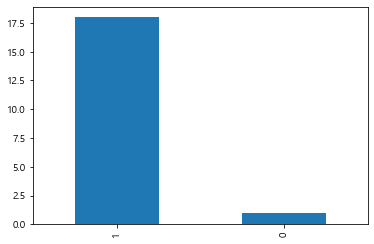

DRUGSP
1    4
Name: drug_90, dtype: int64


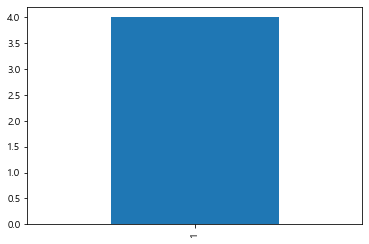

DRUGSL
1    3
Name: drug_90, dtype: int64


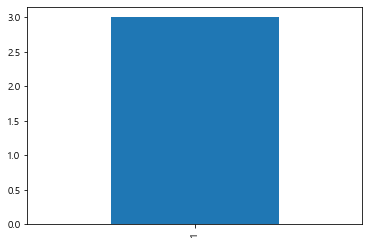

DRUGCP
1    38
0     7
Name: drug_90, dtype: int64


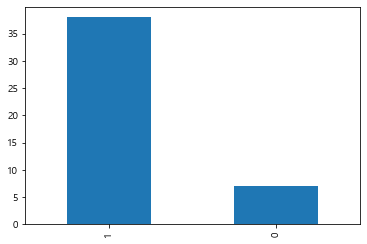

DRUGTB
1    181
0     28
Name: drug_90, dtype: int64


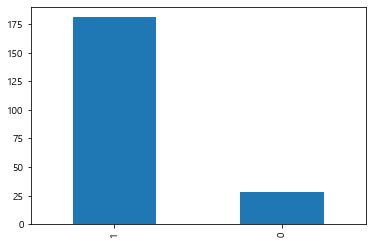

DRUGINS
1    75
0     8
Name: drug_90, dtype: int64


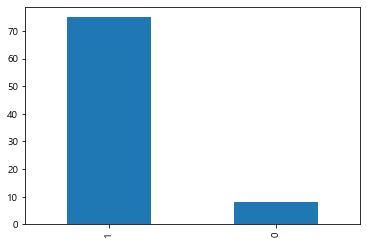

DRUGHT
1    1035
0      59
Name: drug_90, dtype: int64


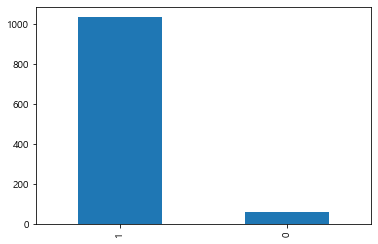

DRUGAR
1    303
0     56
Name: drug_90, dtype: int64


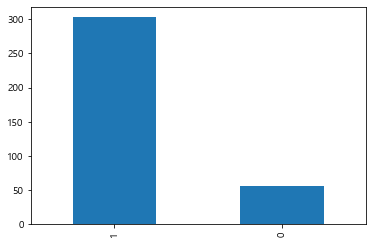

DRUGTH
1    141
0     14
Name: drug_90, dtype: int64


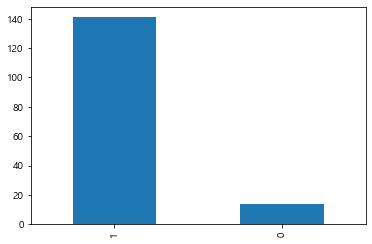

DRUGOR
1    88
0    85
Name: drug_90, dtype: int64


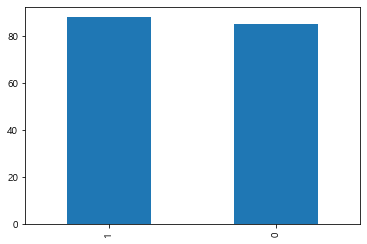

DRUGFH
1    188
0     32
Name: drug_90, dtype: int64


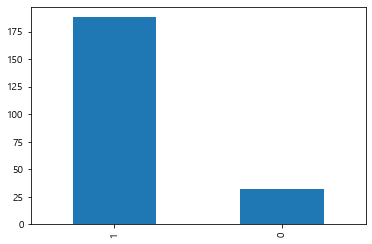

DRUGOS
1    121
0     33
Name: drug_90, dtype: int64


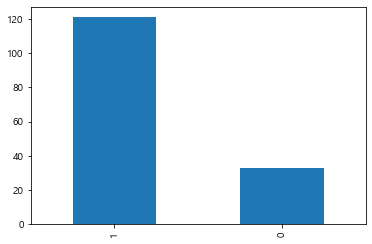

DRUGDM
1    323
0     24
Name: drug_90, dtype: int64


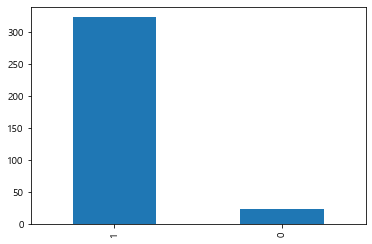

DRUGCD
1    17
Name: drug_90, dtype: int64


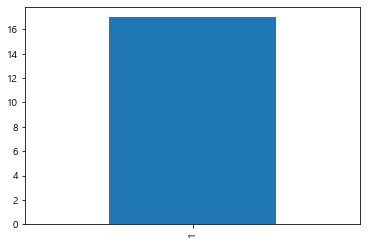

DRUGDI
1    8
0    3
Name: drug_90, dtype: int64


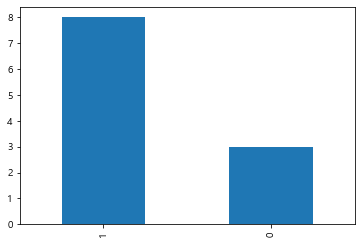

DRUGAS
1    70
0    10
Name: drug_90, dtype: int64


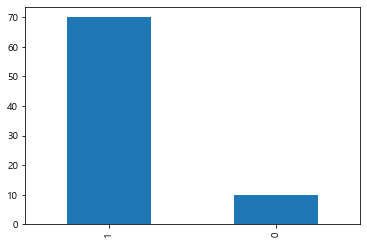

DRUGLP
1    40
0    15
Name: drug_90, dtype: int64


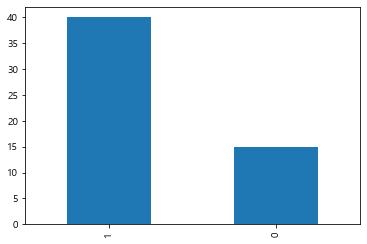

In [1187]:
for name in drug_list: 
    tmp = pd.read_csv('{}_drug90.csv'.format(name), encoding = 'euc-kr')
    
    tmp = tmp.loc[tmp['기수'] == 'A01']
    
    print(name)
    print(tmp['drug_90'].value_counts())
    tmp['drug_90'].value_counts().plot(kind = 'bar')
    plt.show()